In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [4]:
# Load the CSV file from Google Drive
file_path = '/content/drive/My Drive/Final_df.csv'
copurchases = pd.read_csv(file_path)

In [5]:
copurchases.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day_of_week,co_purchases
0,2019-10-01 00:10:56+00:00,purchase,6200687,2053013552293216471,appliances.environment.air_heater,oasis,28.03,548691404,b67cdbcb-b073-4271-b365-803c6fce53b0,0,1,"[6200806, 6200259, 6200704, 3800985, 6200724]"
1,2019-10-01 02:29:01+00:00,purchase,3200361,2053013555321504139,appliances.kitchen.meat_grinder,philips,120.95,553819262,94b897fc-80c6-492c-a456-707398c7cc8e,2,1,"[3200387, 3200310, 3200532, 3200439, 3200305]"
2,2019-10-01 02:30:46+00:00,purchase,3100152,2053013555262783879,appliances.kitchen.blender,panasonic,51.46,527681026,feb31d4f-ceb5-4710-8a8e-391abeaca106,2,1,"[3101064, 3100318, 3600661, 10900003, 10900113]"
3,2019-10-01 02:34:23+00:00,purchase,3601485,2053013563810775923,appliances.kitchen.washer,lg,308.65,513419646,5e227e58-6117-419c-b45d-ac54be44716d,2,1,"[2702347, 2702331, 3600661, 3600163, 3601603]"
4,2019-10-01 02:34:45+00:00,purchase,3700127,2053013565983425517,appliances.environment.vacuum,lg,189.26,512584306,510447fa-8dee-4027-a80a-a17dab9260af,2,1,"[2900958, 3700777, 3800310, 3701313, 3801416]"
5,2019-10-01 02:35:05+00:00,purchase,3601244,2053013563810775923,appliances.kitchen.washer,lg,339.75,551646742,ba2abe11-273b-451c-b89d-c456cffa6501,2,1,"[3600661, 3601437, 3601524, 3600163, 2702277]"
6,2019-10-01 02:36:06+00:00,purchase,2800403,2053013563835941749,appliances.kitchen.refrigerators,NaN,204.33,516426855,788ec8fe-f198-4484-b911-ba5841c55c68,2,1,"[2800037, 2800203, 2800433, 2701714, 2800439]"
7,2019-10-01 02:38:28+00:00,purchase,3900045,2053013552326770905,appliances.environment.water_heater,thermex,84.94,513172531,6b4b047d-5800-49ec-ba3d-ae545eff60e8,2,1,"[11200239, 3601485]"
8,2019-10-01 02:39:58+00:00,purchase,2700920,2053013563911439225,appliances.kitchen.refrigerators,midea,810.81,512416959,4adbf59b-f0b6-4951-8829-12ad5a3f683a,2,1,"[2800385, 2702496, 3601505, 4501554, 2502094]"
9,2019-10-01 02:43:07+00:00,purchase,8700483,2053013563097744201,appliances.personal.hair_cutter,moser,47.88,514018346,35323009-6410-4412-930e-e7855384a5da,2,1,[]


In [6]:
# Convert the 'co_purchases' column from string to list if necessary
import ast
def convert_to_list(co_purchases):
    try:
        return ast.literal_eval(co_purchases)
    except:
        return []

copurchases['co_purchases'] = copurchases['co_purchases'].apply(convert_to_list)

# Filter out rows where 'co_purchases' is empty
filtered_purchases_df = copurchases[copurchases['co_purchases'].apply(len) > 0]

# Display the number of rows before and after filtering
print(f"Number of rows before filtering: {len(copurchases)}")
print(f"Number of rows after filtering: {len(filtered_purchases_df)}")

# Display the filtered DataFrame (sample)
print(filtered_purchases_df.sample(10))


Number of rows before filtering: 174022
Number of rows after filtering: 161120
                       event_time event_type  product_id          category_id                      category_code       brand   price    user_id                          user_session  hour  day_of_week                                     co_purchases
138694  2019-11-17 15:43:21+00:00   purchase     3701222  2053013565983425517      appliances.environment.vacuum      xiaomi  457.93  545918110  f392dc84-555a-4cc8-8ca5-dfb9edfb7e98    15            6   [3701084, 3701397, 3700779, 3701257, 19300096]
94234   2019-11-09 18:34:35+00:00   purchase    10900342  2053013555069845885           appliances.kitchen.mixer    dauscher   11.30  537258458  2a54f080-03eb-408f-a378-974949b334ce    18            5                                        [2501685]
67765   2019-10-28 04:24:57+00:00   purchase     6200958  2053013552293216471  appliances.environment.air_heater         NaN   23.40  538031187  ad06c8e5-7dff-4079-b0e7-56

In [7]:
filtered_file_path = '/content/drive/My Drive/filtered_purchases_df.csv'
filtered_purchases_df.to_csv(filtered_file_path, index=False)
print(f"Filtered DataFrame saved to {filtered_file_path}")



Filtered DataFrame saved to /content/drive/My Drive/filtered_purchases_df.csv


In [8]:
# Group products by session
sessions = filtered_purchases_df.groupby('user_session').apply(lambda x: x[['product_id', 'category_code']].to_dict('records'))

# Display some sessions
print(sessions.head())


user_session
0000be48-eb0e-43e6-8b78-25f8bd078926    [{'product_id': 3900686, 'category_code': 'app...
00012854-9b58-45b6-af66-d61a0039530f    [{'product_id': 3701056, 'category_code': 'app...
00027924-8be6-46cb-a497-150fec7789df    [{'product_id': 2900958, 'category_code': 'app...
0002aaf2-77fd-4cbb-98bb-bbeedf076d90    [{'product_id': 2700344, 'category_code': 'app...
0002f017-b528-4b9d-92ad-de2354c118c2    [{'product_id': 3100640, 'category_code': 'app...
dtype: object


In [9]:
# Create a dictionary to hold co-purchase lists
co_purchases_dict = {}

# Generate co-purchase lists for each product in a session
for session_products in sessions:
    for product in session_products:
        product_id = product['product_id']
        category_code = product['category_code']
        if product_id not in co_purchases_dict:
            co_purchases_dict[product_id] = set()
        for co_product in session_products:
            if co_product['product_id'] != product_id:
                co_purchases_dict[product_id].add((co_product['product_id'], co_product['category_code']))

# Convert sets to lists for easier manipulation
for product_id in co_purchases_dict:
    co_purchases_dict[product_id] = list(co_purchases_dict[product_id])

# Display some co-purchase lists
print({k: co_purchases_dict[k] for k in list(co_purchases_dict)[:5]})


{3900686: [(2401201, 'appliances.kitchen.hood'), (3700907, 'appliances.environment.vacuum'), (3900685, 'appliances.environment.water_heater'), (2800468, 'appliances.kitchen.refrigerators'), (4200542, 'appliances.environment.air_conditioner'), (3900688, 'appliances.environment.water_heater'), (3900773, 'appliances.environment.water_heater'), (3100491, 'appliances.kitchen.blender'), (3601437, 'appliances.kitchen.washer'), (2800194, 'appliances.kitchen.refrigerators'), (3601636, 'appliances.kitchen.washer'), (3200140, 'appliances.kitchen.meat_grinder'), (3600219, 'appliances.kitchen.washer')], 3701056: [(3600182, 'appliances.kitchen.washer'), (3600666, 'appliances.kitchen.washer'), (2900503, 'appliances.kitchen.microwave'), (2900954, 'appliances.kitchen.microwave'), (6302016, 'appliances.kitchen.kettle'), (3200371, 'appliances.kitchen.meat_grinder'), (3700777, 'appliances.environment.vacuum'), (2900536, 'appliances.kitchen.microwave'), (3700898, 'appliances.environment.vacuum'), (6301402,

In [42]:
# Function to get co-purchases for a product ID
def get_co_purchases(product_id):
    return co_purchases_dict.get(product_id, [])

# Add the 'co_purchases' column to the DataFrame
filtered_purchases_df['co_purchases'] = filtered_purchases_df['product_id'].apply(get_co_purchases)

# Unnest the co_purchases column
unnested_data = []

for row in filtered_purchases_df.itertuples():
    for co_purchase in row.co_purchases:
        unnested_data.append((row.product_id, row.category_code, co_purchase[0], co_purchase[1], row.price, row.brand, row.hour, row.day_of_week, row.event_type))

unnested_df = pd.DataFrame(unnested_data, columns=['product_id', 'category_code', 'co_purchase_id', 'co_purchase_category','price','brand','hour','day_of_week', "event_type"])

<ipython-input-42-18f19caa5db3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['co_purchases'] = filtered_purchases_df['product_id'].apply(get_co_purchases)


In [43]:
unnested_df.head(10)

,product_id,category_code,co_purchase_id,co_purchase_category,price,brand,hour,day_of_week,event_type
0,6200687,environment.air_heater,6200259,appliances.environment.air_heater,28.03,oasis,0,1,purchase
1,6200687,environment.air_heater,6200724,appliances.environment.air_heater,28.03,oasis,0,1,purchase
2,6200687,environment.air_heater,3800985,appliances.iron,28.03,oasis,0,1,purchase
3,6200687,environment.air_heater,6200704,appliances.environment.air_heater,28.03,oasis,0,1,purchase
4,6200687,environment.air_heater,6200806,appliances.environment.air_heater,28.03,oasis,0,1,purchase
5,3200361,kitchen.meat_grinder,3200532,appliances.kitchen.meat_grinder,120.95,philips,2,1,purchase
6,3200361,kitchen.meat_grinder,10900210,appliances.kitchen.mixer,120.95,philips,2,1,purchase
7,3200361,kitchen.meat_grinder,2501889,appliances.kitchen.oven,120.95,philips,2,1,purchase
8,3200361,kitchen.meat_grinder,2800007,appliances.kitchen.refrigerators,120.95,philips,2,1,purchase
9,3200361,kitchen.meat_grinder,3200305,appliances.kitchen.meat_grinder,120.95,philips,2,1,purchase


In [44]:

# Searching for product_id 3701222
search_result = unnested_df[unnested_df['product_id'] == 3701222]


In [45]:
search_result.head(10)

,product_id,category_code,co_purchase_id,co_purchase_category,price,brand,hour,day_of_week,event_type
30740,3701222,environment.vacuum,19300096,appliances.ironing_board,475.95,xiaomi,9,1,purchase
30741,3701222,environment.vacuum,3701257,appliances.environment.vacuum,475.95,xiaomi,9,1,purchase
30742,3701222,environment.vacuum,4400312,appliances.kitchen.coffee_machine,475.95,xiaomi,9,1,purchase
30743,3701222,environment.vacuum,3801063,appliances.iron,475.95,xiaomi,9,1,purchase
30744,3701222,environment.vacuum,3700937,appliances.environment.vacuum,475.95,xiaomi,9,1,purchase
30745,3701222,environment.vacuum,3701084,appliances.environment.vacuum,475.95,xiaomi,9,1,purchase
30746,3701222,environment.vacuum,3701397,appliances.environment.vacuum,475.95,xiaomi,9,1,purchase
30747,3701222,environment.vacuum,3700779,appliances.environment.vacuum,475.95,xiaomi,9,1,purchase
30748,3701222,environment.vacuum,6301567,appliances.kitchen.kettle,475.95,xiaomi,9,1,purchase
30749,3701222,environment.vacuum,4200541,appliances.environment.air_conditioner,475.95,xiaomi,9,1,purchase


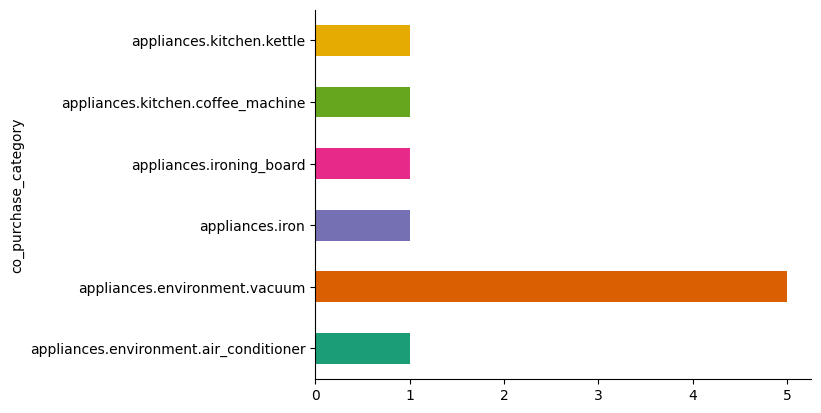

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('co_purchase_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [47]:
# Remove 'appliances.' prefix from the 'category_code' column
unnested_df['category_code'] = unnested_df['category_code'].str.replace('appliances.', '')
unnested_df['co_purchase_category'] = unnested_df['co_purchase_category'].str.replace('appliances.', '')


# Display the first few rows to verify the changes
print(unnested_df.head(20))

    product_id           category_code  co_purchase_id    co_purchase_category   price    brand  hour  day_of_week event_type
0      6200687  environment.air_heater         6200259  environment.air_heater   28.03    oasis     0            1   purchase
1      6200687  environment.air_heater         6200724  environment.air_heater   28.03    oasis     0            1   purchase
2      6200687  environment.air_heater         3800985                    iron   28.03    oasis     0            1   purchase
3      6200687  environment.air_heater         6200704  environment.air_heater   28.03    oasis     0            1   purchase
4      6200687  environment.air_heater         6200806  environment.air_heater   28.03    oasis     0            1   purchase
5      3200361    kitchen.meat_grinder         3200532    kitchen.meat_grinder  120.95  philips     2            1   purchase
6      3200361    kitchen.meat_grinder        10900210           kitchen.mixer  120.95  philips     2            1   p

In [49]:
unnested_df.to_csv('/content/drive/My Drive/unnested.csv', index=False)


In [48]:
# Save the updated DataFrame to a CSV file
file_path = 'unnest_df.csv'
unnested_df.to_csv(file_path, index=False)
print(f"DataFrame saved to {file_path}")

KeyboardInterrupt: 

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
X = filtered_purchases_df[['product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session', 'hour','day_of_week'  ]]
y = filtered_purchases_df['co_purchases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'filtered_purchases_df' is your main DataFrame
# Convert 'event_time' to datetime
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])

# Separate data by event type
views = filtered_purchases_df[filtered_purchases_df['event_type'] == 'view']
add_to_cart = filtered_purchases_df[filtered_purchases_df['event_type'] == 'cart']
purchases = filtered_purchases_df[filtered_purchases_df['event_type'] == 'purchase']

# Extract additional features like 'hour' and 'day_of_week'
purchases['hour'] = purchases['event_time'].dt.hour
purchases['day_of_week'] = purchases['event_time'].dt.dayofweek

# Check the number of products per session
product_counts_per_session = purchases.groupby('user_session')['product_id'].count()

# Filter sessions with more than one product
multi_product_sessions = product_counts_per_session[product_counts_per_session > 1]

# Filter purchases DataFrame to only include sessions with multiple products
multi_product_purchases = purchases[purchases['user_session'].isin(multi_product_sessions.index)]

# Group products by session
transactions = multi_product_purchases.groupby('user_session')['product_id'].apply(list)

# Generate pairs of co-purchased products (excluding pairs of the same product)
pairs = []
for transaction in transactions:
    if len(transaction) > 1:
        pairs.extend([tuple(sorted(pair)) for pair in combinations(transaction, 2) if pair[0] != pair[1]])

# Count the frequency of each pair
pair_counts = Counter(pairs)

# Convert to a DataFrame for easier analysis
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['pair', 'count'])
pair_counts_df = pair_counts_df.sort_values(by='count', ascending=False)

# Display the most common co-purchases of different products
print("Most common co-purchases of different products:")
print(pair_counts_df.head(30))

# Create a new DataFrame to store co-purchase information with features
co_purchase_data = []

for transaction in transactions:
    if len(transaction) > 1:
        for pair in combinations(transaction, 2):
            co_purchase_data.append({
                'product_id_1': pair[0],
                'product_id_2': pair[1],
                'hour': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['hour'].values[0],
                'day_of_week': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['day_of_week'].values[0],
                'price_1': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['price'].values[0],
                'price_2': multi_product_purchases[multi_product_purchases['product_id'] == pair[1]]['price'].values[0],
                'co_purchase': 1
            })

# Convert to DataFrame
co_purchase_df = pd.DataFrame(co_purchase_data)

# Fill NaN values (if any)
co_purchase_df.fillna(0, inplace=True)

# Features and target variable
X = co_purchase_df[['price_1', 'price_2', 'hour', 'day_of_week']]
y = co_purchase_df['co_purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Example usage: predict co-purchase likelihood for a new set of features
new_data = pd.DataFrame({
    'price_1': [100],
    'price_2': [150],
    'hour': [12],
    'day_of_week': [2]
})
predicted_likelihood = model.predict(new_data)
print(f'Predicted Co-purchase Likelihood: {predicted_likelihood[0]}')


<ipython-input-19-6038276760fd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])


Most common co-purchases of different products:
                    pair  count
1119  (2702331, 2702347)    204
369   (3600163, 3601405)     48
91    (3600661, 3600666)     40
4341  (3601124, 3601522)     32
2856  (2702347, 3601485)     32
730   (3600661, 3601405)     31
560   (2702347, 3600661)     30
2857  (2702331, 3601485)     25
492   (3600666, 3601524)     24
1835  (3601405, 3601438)     23
898   (3600163, 3600661)     23
2465  (2701639, 2701646)     18
4653  (2702331, 3600661)     18
465   (2702331, 4201541)     18
755   (2702347, 4201541)     18
1369  (3600661, 3601485)     17
5373  (3601438, 3601508)     17
719   (3600666, 3601405)     17
178   (3600231, 3600253)     16
6210  (3600898, 3601005)     16
1844  (2701646, 2701647)     16
1376  (4201530, 4201541)     16
7170  (3700926, 3900815)     15
4814  (2702347, 3601603)     15
32    (3601603, 3601605)     15
1122  (3700627, 4600591)     15
2555  (3600661, 3601524)     15
4815  (2702347, 3600263)     15
3105  (3700926, 3701056)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Example usage: predict co-purchase likelihood for a new set of features
new_data = pd.DataFrame({
    'price_1': [100],
    'price_2': [150],
    'hour': [12],
    'day_of_week': [2]
})
predicted_likelihood = model.predict(new_data)
print(f'Predicted Co-purchase Likelihood: {predicted_likelihood[0]}')

Mean Squared Error: 0.0
R-squared: 1.0
Accuracy: 1.0
Confusion Matrix:
[[5210]]
Mean Squared Error: 0.0
R-squared: 1.0
Accuracy: 1.0
Confusion Matrix:
[[5210]]
Predicted Co-purchase Likelihood: 1.0


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Assuming 'filtered_purchases_df' is your main DataFrame
# Convert 'event_time' to datetime
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])

# Separate data by event type
views = filtered_purchases_df[filtered_purchases_df['event_type'] == 'view']
add_to_cart = filtered_purchases_df[filtered_purchases_df['event_type'] == 'cart']
purchases = filtered_purchases_df[filtered_purchases_df['event_type'] == 'purchase']

# Extract additional features like 'hour' and 'day_of_week'
purchases['hour'] = purchases['event_time'].dt.hour
purchases['day_of_week'] = purchases['event_time'].dt.dayofweek

# Check the number of products per session
product_counts_per_session = purchases.groupby('user_session')['product_id'].count()

# Filter sessions with more than one product
multi_product_sessions = product_counts_per_session[product_counts_per_session > 1]

# Filter purchases DataFrame to only include sessions with multiple products
multi_product_purchases = purchases[purchases['user_session'].isin(multi_product_sessions.index)]

# Group products by session
transactions = multi_product_purchases.groupby('user_session')['product_id'].apply(list)

# Generate pairs of co-purchased products (excluding pairs of the same product)
pairs = []
for transaction in transactions:
    if len(transaction) > 1:
        pairs.extend([tuple(sorted(pair)) for pair in combinations(transaction, 2) if pair[0] != pair[1]])

# Count the frequency of each pair
pair_counts = Counter(pairs)

# Convert to a DataFrame for easier analysis
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['pair', 'count'])
pair_counts_df = pair_counts_df.sort_values(by='count', ascending=False)

# Display the most common co-purchases of different products
print("Most common co-purchases of different products:")
print(pair_counts_df.head(30))

# Create a new DataFrame to store co-purchase information with features
co_purchase_data = []

for transaction in transactions:
    if len(transaction) > 1:
        for pair in combinations(transaction, 2):
            co_purchase_data.append({
                'product_id_1': pair[0],
                'product_id_2': pair[1],
                'hour': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['hour'].values[0],
                'day_of_week': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['day_of_week'].values[0],
                'price_of_primary_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['price'].values[0],
                'price_of_recommended_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[1]]['price'].values[0],
                'co_purchase': 1
            })

# Generate negative examples
all_products = purchases['product_id'].unique()
negative_pairs = []
np.random.seed(42)

for _ in range(len(co_purchase_data)):
    while True:
        pair = tuple(np.random.choice(all_products, 2, replace=False))
        if pair not in pairs and pair[::-1] not in pairs:
            negative_pairs.append({
                'product_id_1': pair[0],
                'product_id_2': pair[1],
                'hour': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['hour'].values[0],
                'day_of_week': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['day_of_week'].values[0],
                'price_of_primary_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['price'].values[0],
                'price_of_recommended_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[1]]['price'].values[0],
                'co_purchase': 0
            })
            break

# Convert negative examples to DataFrame and combine with positive examples
negative_df = pd.DataFrame(negative_pairs)
co_purchase_df = pd.DataFrame(co_purchase_data)
combined_df = pd.concat([co_purchase_df, negative_df])

# Fill NaN values (if any)
combined_df.fillna(0, inplace=True)

# Features and target variable
X = combined_df[['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week']]
y = combined_df['co_purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model with regularization
model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Example usage: predict co-purchase likelihood for a new set of features
new_data = pd.DataFrame({
    'price_of_primary_product': [100],
    'price_of_recommended_product': [150],
    'hour': [12],
    'day_of_week': [2]
})
predicted_likelihood = model.predict(new_data)
print(f'Predicted Co-purchase Likelihood: {predicted_likelihood[0]}')


<ipython-input-21-627627f0fbba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])


Most common co-purchases of different products:
                    pair  count
1119  (2702331, 2702347)    204
369   (3600163, 3601405)     48
91    (3600661, 3600666)     40
4341  (3601124, 3601522)     32
2856  (2702347, 3601485)     32
730   (3600661, 3601405)     31
560   (2702347, 3600661)     30
2857  (2702331, 3601485)     25
492   (3600666, 3601524)     24
1835  (3601405, 3601438)     23
898   (3600163, 3600661)     23
2465  (2701639, 2701646)     18
4653  (2702331, 3600661)     18
465   (2702331, 4201541)     18
755   (2702347, 4201541)     18
1369  (3600661, 3601485)     17
5373  (3601438, 3601508)     17
719   (3600666, 3601405)     17
178   (3600231, 3600253)     16
6210  (3600898, 3601005)     16
1844  (2701646, 2701647)     16
1376  (4201530, 4201541)     16
7170  (3700926, 3900815)     15
4814  (2702347, 3601603)     15
32    (3601603, 3601605)     15
1122  (3700627, 4600591)     15
2555  (3600661, 3601524)     15
4815  (2702347, 3600263)     15
3105  (3700926, 3701056)

In [ ]:
print(combined_df.sample(n=20))

       product_id_1  product_id_2  hour  day_of_week  price_of_primary_product  price_of_recommended_product  co_purchase
4817        3701163       2401365     5            6                    222.63                        406.19            0
1805        2400665       3800195    12            3                     46.31                         46.31            1
11133      10900043       4201065     7            6                     14.16                        550.59            0
15158       4501337       3800793    13            0                    121.49                         28.29            0
4039        2401743       3701224    10            6                    174.78                        123.53            0
21013       3200324       2800236     9            2                    199.49                        253.77            1
865        19300096       3800331    13            1                     38.59                         41.16            1
22417       2900022     

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced')

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final model with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')

# Cross-validation score
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores)}')


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8417466410748561
Confusion Matrix:
[[4523  743]
 [ 906 4248]]
Cross-validation scores: [0.80508637 0.82514395 0.80297505 0.81303388 0.808043  ]
Average cross-validation score: 0.8108564506118767


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create models
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Perform grid search with cross-validation for each model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit models
rf_grid_search.fit(X_resampled, y_resampled)

# Best parameters and models
rf_best_model = rf_grid_search.best_estimator_

print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Best parameters obtained from GridSearchCV
best_params = {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

# Create the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')

# Train the model with resampled data (assuming SMOTE was applied previously)
best_rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_best_rf)

# Print evaluation metrics
print(f'Best Random Forest Accuracy: {accuracy_best_rf}')
print(f'Best Random Forest Confusion Matrix:\n{conf_matrix_best_rf}')
print(f'Best Random Forest Precision: {precision_best_rf}')
print(f'Best Random Forest Recall: {recall_best_rf}')
print(f'Best Random Forest F1-Score: {f1_best_rf}')
print(f'Best Random Forest ROC-AUC: {roc_auc_best_rf}')


Best Random Forest Accuracy: 0.9245681381957773
Best Random Forest Confusion Matrix:
[[4990  276]
 [ 510 4644]]
Best Random Forest Precision: 0.9439024390243902
Best Random Forest Recall: 0.9010477299185099
Best Random Forest F1-Score: 0.9219773674806433
Best Random Forest ROC-AUC: 0.9243180161176293


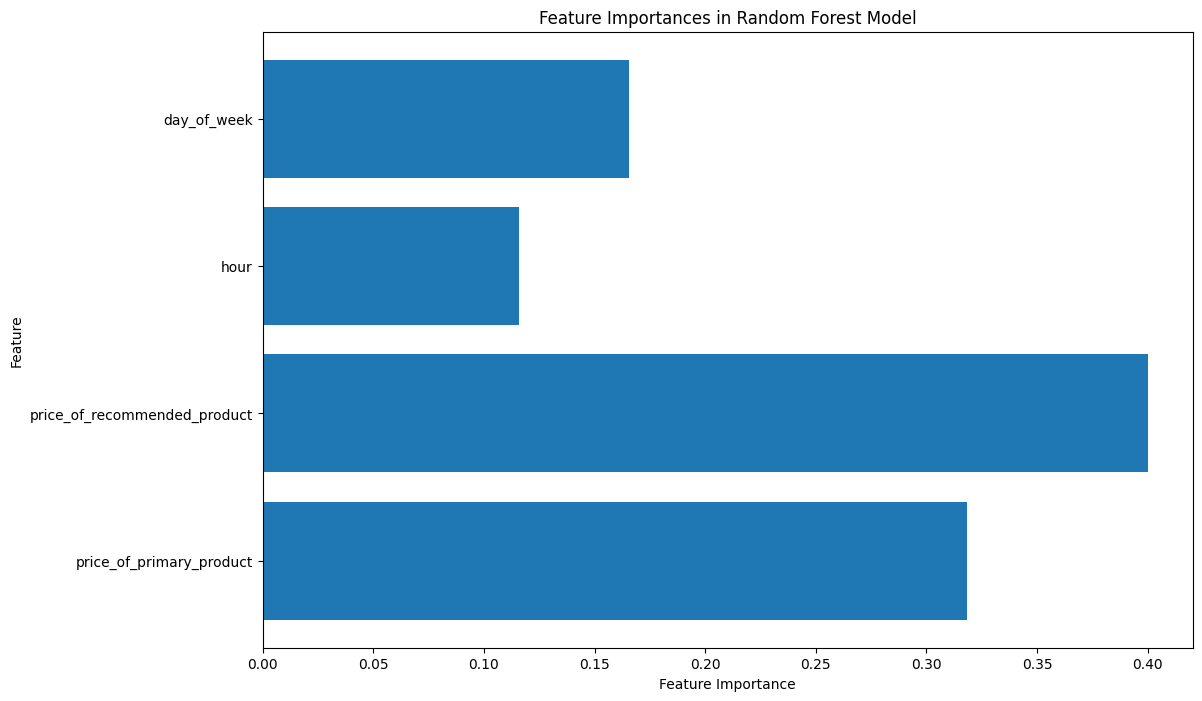

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Display feature importances for the best random forest model
feature_importances = best_rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()


In [ ]:
# Display the feature names
print("Feature names (X):")
print(X.columns)

# Display the first few rows of the features
print("\nFirst few rows of features (X):")
print(X.head())

# Display the target variable
print("\nTarget variable (y):")
print(y.head())


Feature names (X):
Index(['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week'], dtype='object')

First few rows of features (X):
   price_of_primary_product  price_of_recommended_product  hour  day_of_week
0                    504.40                        385.90    17            4
1                     40.67                         40.67     9            4
2                    319.14                        319.14     5            1
3                     48.88                        105.28    16            1
4                     61.38                         40.93     5            1

Target variable (y):
0    1
1    1
2    1
3    1
4    1
Name: co_purchase, dtype: int64


In [ ]:
# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_model = GradientBoostingClassifier(random_state=42)

gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')

gb_grid_search.fit(X_resampled, y_resampled)

gb_best_model = gb_grid_search.best_estimator_
print(f"Best Gradient Boosting Parameters: {gb_grid_search.best_params_}")

Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the coefficients from the best Logistic Regression model
coefficients = best_lr_model.coef_[0]

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(coefficients)
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.title('Feature Importances in Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


NameError: name 'best_lr_model' is not defined

In [ ]:
# Define parameter grid for Neural Network
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

nn_model = MLPClassifier(max_iter=500, random_state=42)

nn_grid_search = GridSearchCV(estimator=nn_model, param_grid=nn_param_grid, cv=5, n_jobs=-1, scoring='accuracy')

nn_grid_search.fit(X_resampled, y_resampled)

nn_best_model = nn_grid_search.best_estimator_

print(f"Best Neural Network Parameters: {nn_grid_search.best_params_}")

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Best parameters obtained from GridSearchCV
best_nn_params = {
    'activation': 'relu',
    'alpha': 0.01,
    'hidden_layer_sizes': (50, 50),
    'learning_rate': 'constant',
    'solver': 'adam'
}

# Create the Neural Network model with the best parameters
best_nn_model = MLPClassifier(**best_nn_params, max_iter=1000, random_state=42)

# Train the model with training data
best_nn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nn = best_nn_model.predict(X_test)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)

# Print evaluation metrics
print(f'Neural Network Accuracy: {accuracy_nn}')
print(f'Neural Network Confusion Matrix:\n{conf_matrix_nn}')
print(f'Neural Network Precision: {precision_nn}')
print(f'Neural Network Recall: {recall_nn}')
print(f'Neural Network F1-Score: {f1_nn}')
print(f'Neural Network ROC-AUC: {roc_auc_nn}')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the absolute values of the weights of the input layer
input_layer_weights = np.abs(best_nn_model.coefs_[0])

# Calculate the average importance of each feature by taking the mean of the absolute weights for each input neuron
feature_importances = np.mean(input_layer_weights, axis=1)

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Neural Network Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()
